In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.utils import to_categorical
import os
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import load_model

Using Theano backend.


In [2]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
from keras.applications import VGG16

vgg_conv = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [4]:
#load classification model from file
model = load_model('vgg16_atbook_classif.h5')

#load labels for model labels
label2index = json.load(open('classes_dict.json'))

In [46]:
filename = 'images/1196225.jpg'

PIL image size (224, 224)


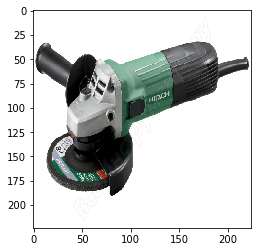

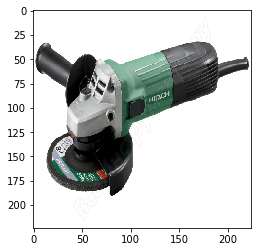

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


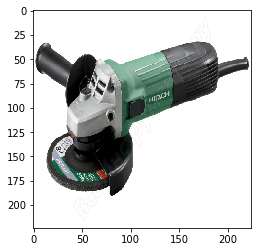

In [47]:
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()

# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)

# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [48]:
#Get Image feature from VGG16 Model
image_for_processing = image_batch.copy()
image_features = vgg_conv.predict(image_for_processing)

#Reshape feature for our classifier
image_features = np.reshape(image_features, (1, 7 * 7 * 512))

In [49]:
#make prediction
prediction = model.predict_classes(image_features)
prob = model.predict(image_features)

1/1 [==============================] - 0s


In [50]:
#Show prediction label
for lable, key in label2index.items():
    if key == prediction:
        print('Prediction class = {0}'.format(lable))

Prediction class = 2583-grinder
